**PROJECT TITLE:Sentiment Analysis OF TWITTER dataset**

The primary goal of this project is to develop a sentiment analysis model for twitter dataset  that can accurately classify the
sentiment of text data, providing valuable insights into public opinion, customer feedback, and
social media trends  code implementation

**Introduction to Sentiment Analysis**

Sentiment analysis, also known as opinion mining, is the process of analyzing text data to determine the sentiment or opinion expressed within it. It involves identifying whether a piece of text conveys positive, negative, or neutral sentiment, as well as the intensity of that sentiment.

In [31]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/Twitter_Data.csv')
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [33]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [34]:
data['clean_text'].fillna('', inplace=True)
# Drop rows with missing values in the 'category' column
data.dropna(subset=['category'], inplace=True)

In [35]:
# Confirming the changes
data.isnull().sum()

clean_text    0
category      0
dtype: int64

In [36]:
data.duplicated().sum()

1

In [37]:
data.drop_duplicates(inplace=True)

In [39]:
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In this implementation, we preprocess the text data by tokenizing, removing stopwords and special characters, and lemmatizing the words. We then convert the preprocessed text data into TF-IDF features and train a Naive Bayes classifier on the training data. Finally, we evaluate the model's performance on the test data and can use it for sentiment analysis on new tweets.

In [40]:
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and special characters, and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['clean_text'].apply(preprocess_text)

**Feature Extraction**

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['processed_text'])
y = data['category']

#Model Training

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sentiment Distribution

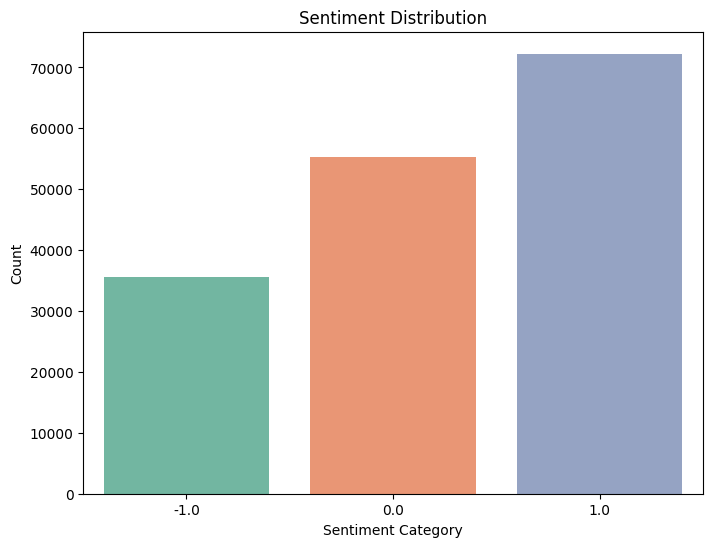

In [45]:

plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

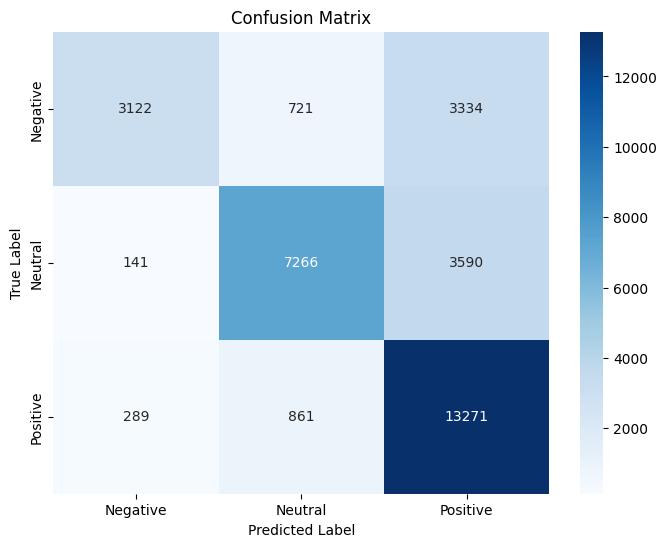

In [46]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Model Evaluation

In [48]:

y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7258475226261697
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.44      0.58      7177
         0.0       0.82      0.66      0.73     10997
         1.0       0.66      0.92      0.77     14421

    accuracy                           0.73     32595
   macro avg       0.79      0.67      0.69     32595
weighted avg       0.76      0.73      0.71     32595



In [49]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['clean_text'].apply(pol)
data['subjectivity'] = data['clean_text'].apply(sub)
data

,clean_text,category,processed_text,polarity,subjectivity
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...,-0.300000,0.700000
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...,0.483333,0.616667
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...,0.150000,0.658333
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...,0.400000,0.750000
...,...,...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,crore paid neerav modi recovered congress lead...,-0.291667,0.541667
162976,dear rss terrorist payal gawar what about modi...,-1.0,dear r terrorist payal gawar modi killing plus...,-0.195833,0.433333
162977,did you cover her interaction forum where she ...,0.0,cover interaction forum left,0.000000,0.000000
162978,there big project came into india modi dream p...,0.0,big project came india modi dream project happ...,0.000000,0.100000


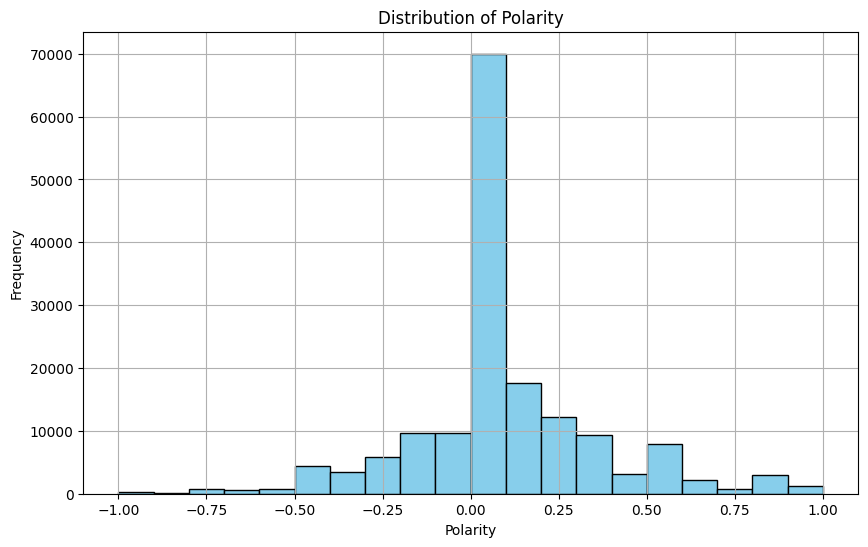

In [50]:

# Plot Polarity
plt.figure(figsize=(10, 6))
plt.hist(data['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



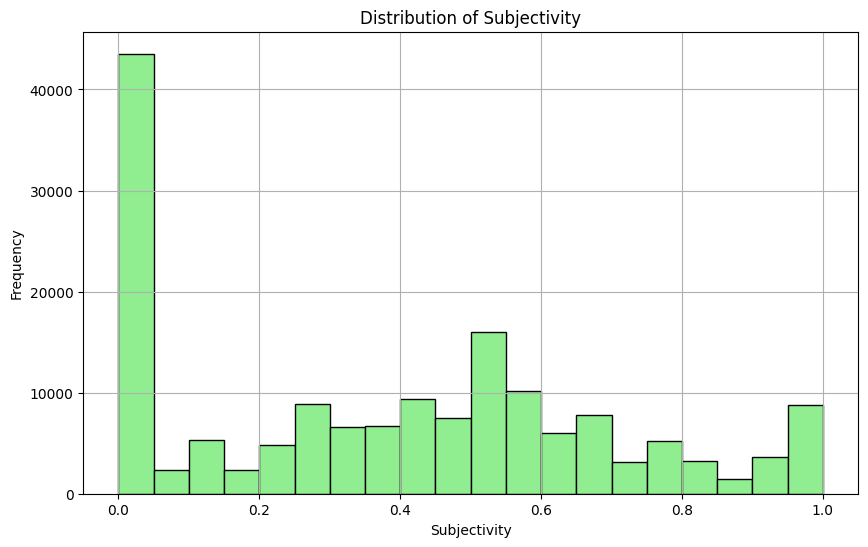

In [51]:
# Plot Subjectivity
plt.figure(figsize=(10, 6))
plt.hist(data['subjectivity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()